## Практическая работа №9
+ Язык программирования: Python
+ Создать тематическую модель

Решение:
+ Загрузить библиотеку genism.

In [2]:
%pip install gensim
%pip install pandarallel
%pip install pandas
%pip install beautifulsoup4
%pip install lxml
%pip install pyldavis

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviou

В качестве исходного набора данных будет использоваться набор:
+ Стандартный набор для машинного обучения – собрание текстов
новостей AP (Associated Press)
+ В наборе 2246 документов и они представлены в нужном для
моделирования формате.
+ В папке /ap представлены сами документы (ap.txt, ap.dat), словарь
(vocab.txt).

Файл ap.dat состоит из кол-ва слов и номеров слов из словаря и частот
записанных в формате 178:1.
В файле ap.txt хранятся исходные тексты.

In [3]:
import tarfile 

with tarfile.open('./ap.tgz') as archive:
    archive.extractall('./ap')

3 Для построения модели используется конструктор с большим
количеством параметров:
class gensim.models.ldamodel.LdaModel( corpus=None, num_topics=100,
id2word=None,
distributed=False,
update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0,
eval_every=10,
iterations=50,
minimum_probability=0.01,
random_state=None,
minimum_phi_value=0.01, per_word_topics=False, callbacks=None)
В примере используются параметры:
+ corpus – набор текстов,
+ id2word - используется для определения размера словаря,
+ alpha - по умолчанию 1/num_topics, чем меньше alpha, тем
меньше ожидаемое число тем для каждого документа, и
наоборот.

In [4]:
from gensim import corpora, models

corpus = corpora.BleiCorpus('./ap/ap/ap.dat', './ap/ap/vocab.txt')

In [5]:
model = models.ldamodel.LdaModel(corpus, id2word = corpus.id2word)

In [6]:
doc = corpus.docbyoffset(0) # первый документ
topics = model[doc]
print(topics)

[(3, 0.027828705), (6, 0.14377332), (10, 0.011454863), (25, 0.012984596), (30, 0.022212703), (32, 0.38925582), (33, 0.03350465), (37, 0.015466994), (39, 0.025178144), (48, 0.07977897), (72, 0.01068886), (76, 0.19406036), (79, 0.022741333)]


In [7]:
# данные для гистограммы частотности тем, ассоциированных с документами
num_topics_used = [len(model[doc]) for doc in corpus]
print (num_topics_used)

[13, 13, 7, 18, 5, 8, 14, 6, 3, 3, 7, 15, 8, 4, 1, 9, 15, 10, 10, 13, 3, 3, 2, 9, 13, 8, 12, 11, 12, 15, 12, 14, 6, 4, 9, 11, 13, 12, 10, 5, 15, 5, 19, 9, 12, 13, 4, 14, 12, 13, 5, 3, 15, 13, 14, 4, 15, 7, 9, 2, 11, 15, 11, 9, 6, 6, 10, 14, 3, 5, 8, 9, 11, 4, 11, 15, 15, 8, 16, 12, 16, 10, 4, 5, 10, 15, 8, 3, 7, 8, 9, 10, 11, 15, 11, 8, 6, 4, 8, 11, 22, 13, 3, 11, 2, 7, 8, 14, 6, 13, 8, 16, 7, 6, 15, 13, 14, 11, 11, 11, 5, 2, 4, 16, 4, 9, 10, 5, 7, 10, 4, 11, 8, 10, 10, 12, 12, 11, 15, 7, 8, 9, 12, 5, 11, 13, 9, 11, 1, 14, 3, 2, 12, 8, 7, 7, 9, 11, 13, 4, 8, 7, 8, 12, 5, 8, 14, 14, 9, 16, 3, 12, 6, 16, 7, 10, 6, 9, 7, 14, 7, 2, 5, 8, 7, 7, 6, 6, 4, 10, 13, 19, 6, 14, 12, 7, 7, 14, 13, 5, 14, 16, 6, 11, 9, 8, 14, 5, 5, 12, 10, 6, 4, 11, 8, 14, 8, 6, 15, 6, 8, 3, 7, 11, 19, 4, 2, 3, 17, 8, 11, 13, 13, 15, 14, 17, 9, 7, 12, 7, 4, 5, 18, 8, 9, 10, 2, 17, 8, 13, 12, 6, 8, 15, 11, 6, 10, 2, 18, 2, 12, 16, 11, 8, 8, 9, 9, 17, 8, 15, 4, 5, 10, 7, 7, 11, 11, 12, 16, 6, 13, 7, 11, 9, 12, 12, 14,

(array([155., 278., 349., 427., 390., 431., 131.,  56.,  20.,   9.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

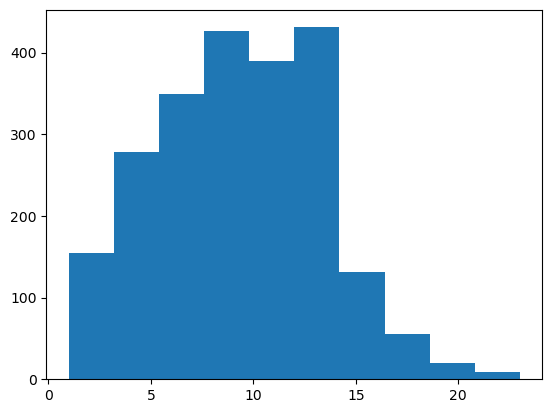

In [8]:
import matplotlib.pyplot as plt
plt.hist(num_topics_used)

In [9]:
for ti in range(10):
    words = model.show_topic(ti, 64)
    print (words)
    print()

[('macmillan', 0.042467203), ('maxwell', 0.039606996), ('heat', 0.010642059), ('games', 0.0097952755), ('people', 0.009290161), ('olympics', 0.0092253145), ('mohawk', 0.008977818), ('publishing', 0.007889484), ('water', 0.007879545), ('information', 0.00704312), ('share', 0.0067169867), ('workplace', 0.006155569), ('restructuring', 0.006038448), ('interested', 0.0059386985), ('north', 0.005678971), ('weather', 0.005659427), ('court', 0.0053828266), ('friday', 0.0044911285), ('drives', 0.0044227517), ('beaches', 0.0043942365), ('korea', 0.0039815367), ('state', 0.0039516655), ('communications', 0.0038488705), ('th', 0.0035460447), ('billion', 0.0034624368), ('high', 0.0032073022), ('scheduled', 0.0031107487), ('physical', 0.003104683), ('monday', 0.0030978217), ('wave', 0.0030812668), ('company', 0.0030010995), ('proposed', 0.002999539), ('i', 0.002870648), ('week', 0.0028684519), ('two', 0.002824006), ('bodies', 0.0027711377), ('abc', 0.002747578), ('three', 0.0026302983), ('pay', 0.00

In [10]:
#вывод 10 тем с 10 словами в каждой и их вероятностями
print(model.print_topics(num_topics=10, num_words=10))

[(64, '0.019*"soviet" + 0.016*"gravity" + 0.011*"space" + 0.011*"mission" + 0.011*"probe" + 0.008*"surface" + 0.008*"planet" + 0.008*"symphony" + 0.007*"map" + 0.007*"scientists"'), (62, '0.055*"percent" + 0.013*"gunter" + 0.007*"poll" + 0.006*"economy" + 0.006*"bushs" + 0.005*"energy" + 0.005*"survey" + 0.005*"average" + 0.004*"agreement" + 0.004*"two"'), (6, '0.034*"yeutter" + 0.012*"ireland" + 0.012*"dinner" + 0.010*"corrections" + 0.009*"clayton" + 0.008*"i" + 0.007*"brown" + 0.006*"cisneros" + 0.006*"northern" + 0.006*"agriculture"'), (4, '0.007*"cast" + 0.006*"card" + 0.006*"castle" + 0.005*"national" + 0.004*"i" + 0.004*"literature" + 0.004*"president" + 0.004*"bunch" + 0.004*"dates" + 0.004*"last"'), (81, '0.026*"arafat" + 0.015*"peres" + 0.015*"plo" + 0.014*"i" + 0.014*"china" + 0.012*"chinese" + 0.009*"talks" + 0.007*"await" + 0.006*"party" + 0.006*"israel"'), (66, '0.068*"hudson" + 0.016*"seconddegree" + 0.016*"plot" + 0.012*"slaying" + 0.010*"umbrella" + 0.008*"million" + 0

4 Выполнить предобработку текстов из ap.txt – удаление стоп-слов, стемминг или лемматизацию. Сформировать новые ap.dat и vocab.txt

In [11]:
from pandarallel import pandarallel
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

pandarallel.initialize(progress_bar=True)


def preprocess(text):
    from nltk.tokenize import sent_tokenize
    from string import punctuation
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    sentences = sent_tokenize(text)
    # Lower case
    sentences = [sentence.lower() for sentence in sentences]
    # Remove punctuation
    sentences = [
        "".join(c for c in sentence if c not in punctuation) for sentence in sentences
    ]
    # Tokenize words
    sentences = [word_tokenize(sentence) for sentence in sentences]
    # Remove stopwords
    stop_words = stopwords.words("english")
    sentences = [
        [word for word in sentence if word not in stop_words] for sentence in sentences
    ]
    # Remove links
    sentences = [
        [word for word in sentence if not word.startswith("http")]
        for sentence in sentences
    ]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sentences = [
        [lemmatizer.lemmatize(word) for word in sentence] for sentence in sentences
    ]
    words = " ".join([" ".join(sentence) for sentence in sentences])
    return words

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...


INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data]   Package wordnet is already up-to-date!


In [12]:
import pandas as pd

from bs4 import BeautifulSoup

with open("./ap/ap/ap.txt") as f:
    content = f.readlines()

content = [x.strip() for x in content]
content = " ".join(content)

soup = BeautifulSoup(content, "lxml")
texts = soup.findAll("text")
docno = soup.findAll("docno")

texts = [text.text.strip() for text in texts]
docno = [doc.text for doc in docno]

df = pd.DataFrame({"docno": docno, "text": texts})

In [13]:
# Create dir new_ap
import os
if not os.path.exists("new_ap"):
    os.makedirs("new_ap")
# Save to csv
df.to_csv("./new_ap/ap.csv", index=False)

In [14]:
# Load csv file
df = pd.read_csv("./new_ap/ap.csv")
# Drop rows with empty text
df = df.dropna(subset=["text"])
df.head()

,docno,text
0,AP881218-0003,A 16-year-old student at a private Baptist sch...
1,AP880224-0195,The Bechtel Group Inc. offered in 1985 to sell...
2,AP881017-0144,A gunman took a 74-year-old woman hostage afte...
3,AP881017-0219,"Today is Saturday, Oct. 29, the 303rd day of 1..."
4,AP900117-0022,Cupid has a new message for lovers this Valent...


In [15]:
# Preprocess text
df["text_processed"] = df["text"].parallel_apply(preprocess)

/opt/conda/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

In [16]:
df.head()

,docno,text,text_processed
0,AP881218-0003,A 16-year-old student at a private Baptist sch...,16yearold student private baptist school alleg...
1,AP880224-0195,The Bechtel Group Inc. offered in 1985 to sell...,bechtel group inc offered 1985 sell oil israel...
2,AP881017-0144,A gunman took a 74-year-old woman hostage afte...,gunman took 74yearold woman hostage foiled att...
3,AP881017-0219,"Today is Saturday, Oct. 29, the 303rd day of 1...",today saturday oct 29 303rd day 1988 63 day le...
4,AP900117-0022,Cupid has a new message for lovers this Valent...,cupid new message lover valentine day voluntee...


In [17]:
texts = [text.split() for text in df["text_processed"]]

In [18]:
wordsList = []
for text in texts:
    wordsList.extend(text)

wordsList = list(set(wordsList))
print(len(wordsList))

37901


In [19]:
with open("./new_ap/vocab.txt", "w") as f:
    for word in wordsList:
        f.write(word + "\n")

In [20]:
with open("./new_ap/ap.dat", "w") as f:
    for text in texts:
        f.write(str(len(text)) + " ")
        for word in text:
            f.write(str(wordsList.index(word)) + ":" + str(text.count(word)) + " ")
        f.write("\n")

In [21]:
new_corpus = corpora.BleiCorpus("./new_ap/ap.dat", "./new_ap/vocab.txt")

new_model = models.ldamodel.LdaModel(new_corpus, id2word=new_corpus.id2word)

new_doc = new_corpus.docbyoffset(0)  # первый документ
new_topics = new_model[new_doc]
print(new_topics)

[(0, 0.09385917), (16, 0.21091282), (19, 0.022443732), (47, 0.033315822), (56, 0.5672855), (68, 0.042482045), (76, 0.011321377)]


In [22]:
new_num_topics_used = [len(new_model[doc]) for doc in new_corpus]
print(new_num_topics_used)

[7, 4, 6, 13, 3, 8, 4, 4, 3, 13, 3, 7, 9, 4, 1, 6, 11, 3, 9, 6, 5, 3, 4, 7, 4, 8, 3, 9, 7, 6, 1, 4, 7, 6, 3, 1, 7, 6, 11, 5, 6, 3, 9, 6, 5, 5, 3, 1, 9, 6, 4, 7, 4, 10, 8, 5, 7, 2, 11, 2, 9, 6, 2, 9, 5, 8, 9, 6, 4, 6, 5, 3, 6, 9, 2, 9, 3, 3, 3, 11, 10, 12, 5, 3, 11, 5, 6, 6, 6, 8, 6, 3, 6, 8, 9, 9, 3, 5, 5, 3, 6, 10, 3, 2, 8, 4, 9, 9, 1, 8, 5, 11, 5, 2, 6, 4, 6, 4, 1, 2, 4, 5, 4, 7, 5, 2, 5, 6, 5, 5, 9, 2, 4, 9, 6, 6, 11, 7, 10, 8, 5, 4, 7, 7, 11, 11, 10, 7, 4, 7, 4, 3, 3, 7, 2, 2, 3, 13, 5, 5, 8, 1, 6, 12, 5, 10, 5, 2, 8, 9, 6, 9, 4, 8, 9, 3, 5, 9, 5, 5, 2, 4, 9, 3, 3, 5, 6, 6, 5, 5, 9, 10, 3, 6, 3, 4, 8, 8, 9, 6, 5, 8, 7, 5, 7, 8, 6, 5, 3, 11, 8, 3, 7, 3, 8, 6, 6, 7, 2, 7, 7, 7, 8, 6, 8, 9, 4, 4, 12, 6, 4, 5, 7, 4, 12, 8, 5, 6, 12, 4, 4, 5, 4, 4, 4, 10, 3, 6, 9, 4, 10, 5, 12, 11, 7, 5, 4, 2, 2, 5, 11, 3, 3, 7, 4, 4, 5, 3, 6, 6, 5, 8, 6, 6, 9, 4, 8, 5, 8, 5, 7, 4, 6, 6, 7, 3, 9, 6, 7, 7, 5, 7, 7, 9, 10, 8, 9, 13, 5, 4, 10, 7, 3, 8, 9, 3, 5, 9, 5, 6, 13, 7, 4, 10, 9, 3, 9, 4, 11, 5, 3, 

[('said', 0.038477186), ('yeutter', 0.010521729), ('farm', 0.0072878967), ('state', 0.005937679), ('u', 0.00570022), ('would', 0.005181453), ('police', 0.004931017), ('united', 0.004736424), ('ec', 0.004694093), ('one', 0.004657284), ('document', 0.004410907), ('case', 0.0043799663), ('year', 0.004349922), ('patient', 0.003980148), ('subsidy', 0.0038246028), ('trade', 0.0036640984), ('talk', 0.0035869367), ('agriculture', 0.0034684849), ('plant', 0.0033451205), ('also', 0.0030682192), ('trial', 0.0028354393), ('drug', 0.0025720082), ('valve', 0.002569989), ('official', 0.0025597739), ('man', 0.0025360335), ('judge', 0.0025249226), ('people', 0.0025077262), ('uruguay', 0.002503643), ('whether', 0.0024870017), ('going', 0.0024530604), ('government', 0.002387933), ('arrested', 0.0023628566), ('could', 0.0023247302), ('last', 0.0023172633), ('round', 0.0023158505), ('mr', 0.0022701952), ('want', 0.0022264), ('baby', 0.0022079665), ('report', 0.002182259), ('time', 0.002154279), ('child', 0

[('dress', 0.06320692), ('style', 0.016954524), ('year', 0.012974005), ('new', 0.008833786), ('skirt', 0.008760407), ('firm', 0.008398034), ('color', 0.007816088), ('guest', 0.0076775793), ('say', 0.006531617), ('neckline', 0.00647802), ('worn', 0.0063714017), ('cost', 0.006356859), ('fabric', 0.006321889), ('chef', 0.0061189104), ('tie', 0.0057829022), ('abbey', 0.0056183496), ('may', 0.0055239163), ('often', 0.005499949), ('look', 0.0048487596), ('york', 0.0048384774), ('served', 0.004379736), ('short', 0.004324958), ('pink', 0.00426566), ('costume', 0.0042124093), ('price', 0.004030891), ('country', 0.003980166), ('fashion', 0.0039651566), ('found', 0.0038292487), ('specialist', 0.0037843285), ('part', 0.0036520297), ('gown', 0.0036127977), ('dish', 0.0035981918), ('brokerage', 0.0035425068), ('two', 0.003486551), ('among', 0.003484615), ('men', 0.0034301754), ('according', 0.0033139905), ('long', 0.003312745), ('500', 0.003301112), ('wedding', 0.0032736578), ('said', 0.0031921903),

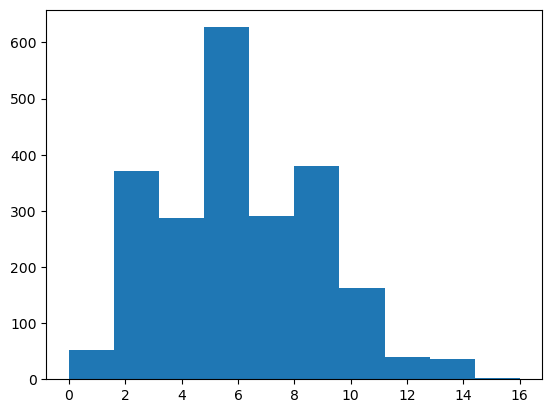

In [23]:
import matplotlib.pyplot as plt

plt.hist(new_num_topics_used)

for ti in range(10):
    words = new_model.show_topic(ti, 64)
    print(words)
    print()

In [24]:
print(new_model.print_topics(num_topics=10, num_words=10))

[(17, '0.025*"said" + 0.012*"new" + 0.009*"york" + 0.008*"iraq" + 0.006*"ruby" + 0.005*"fire" + 0.005*"also" + 0.005*"iraqi" + 0.004*"hudson" + 0.004*"would"'), (34, '0.007*"stock" + 0.006*"exceeded" + 0.006*"414" + 0.006*"said" + 0.003*"union" + 0.003*"worker" + 0.003*"company" + 0.003*"new" + 0.002*"year" + 0.002*"today"'), (20, '0.050*"venus" + 0.028*"jupiter" + 0.023*"spacecraft" + 0.018*"planet" + 0.017*"earth" + 0.014*"nasa" + 0.011*"said" + 0.011*"mission" + 0.010*"surface" + 0.007*"trip"'), (57, '0.020*"said" + 0.015*"tax" + 0.015*"maxwell" + 0.012*"would" + 0.012*"state" + 0.009*"macmillan" + 0.009*"mecham" + 0.007*"share" + 0.006*"trial" + 0.005*"offer"'), (53, '0.026*"mason" + 0.010*"said" + 0.008*"charlie" + 0.005*"u" + 0.005*"year" + 0.005*"vocal" + 0.005*"buster" + 0.005*"vocalist" + 0.004*"would" + 0.003*"military"'), (73, '0.025*"bridal" + 0.014*"jackson" + 0.011*"said" + 0.011*"simon" + 0.008*"peach" + 0.008*"update" + 0.005*"silk" + 0.005*"say" + 0.005*"would" + 0.004

5. Для определения качества модели используется встроенная функция, которая определяет связность тем.
from gensim.models import CoherenceModel
coherencemodel = CoherenceModel(model=model, texts=texts,
dictionary=corpus.id2word, coherence=measure)

С помощью этих метрик определить оптимальное кол-во тем. Для этого
можно написать функцию, куда передаются начальное кол-во тем, шаг,
максимальное кол-во тем и метрику. Значения метрик отразить на графике.
(c_uci и c_vscore)

In [25]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from tqdm import tqdm

def get_coherence_model(start, step, limit, measure, dictionary, corpus__, texts__):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = models.ldamodel.LdaModel(
            corpus__, num_topics=num_topics, id2word=corpus__.id2word
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts__, dictionary=dictionary, coherence=measure
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
dictionary = Dictionary(texts) # Preprocessed data
model_list, c_uci_coherence_values = get_coherence_model(2, 2, 40, "c_uci", dictionary, new_corpus, texts)
model_list, c_v_coherence_values = get_coherence_model(2, 2, 40, "c_v", dictionary, new_corpus, texts)

100%|██████████| 19/19 [01:20<00:00,  4.25s/it]


In [27]:
old_corpus = corpora.BleiCorpus("./ap/ap/ap.dat", "./ap/ap/vocab.txt")
old_texts = [text.split() for text in df["text"]]
old_dictionary = Dictionary(old_texts) # Not preprocessed data
old_model_list, old_c_uci_coherence_values = get_coherence_model(2, 2, 40, "c_uci", old_dictionary, old_corpus, old_texts)
old_model_list, old_c_v_coherence_values = get_coherence_model(2, 2, 40, "c_v", old_dictionary, old_corpus, old_texts)

100%|██████████| 19/19 [01:55<00:00,  6.06s/it]


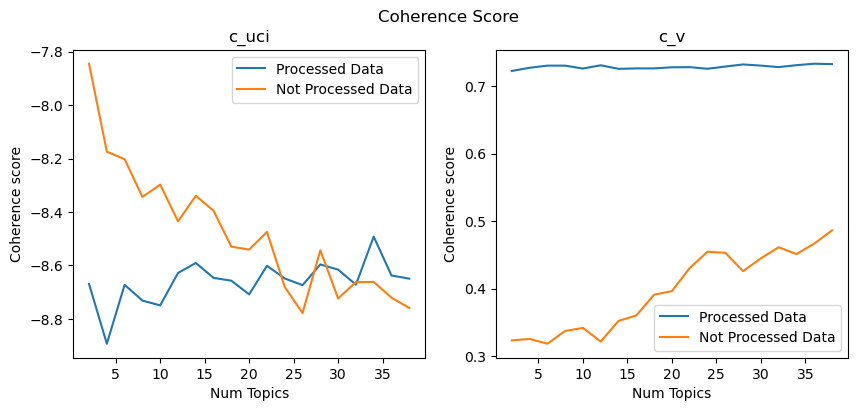

In [28]:
import matplotlib.pyplot as plt

limit = 40
start = 2
step = 2
x = range(start, limit, step)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(x, c_uci_coherence_values)
ax1.plot(x, old_c_uci_coherence_values)
ax1.set_xlabel("Num Topics")
ax1.set_ylabel("Coherence score")
ax1.legend(("Processed Data", "Not Processed Data"), loc="best")
ax1.set_title("c_uci")
ax2.plot(x, c_v_coherence_values)
ax2.plot(x, old_c_v_coherence_values)
ax2.set_xlabel("Num Topics")
ax2.set_ylabel("Coherence score")
ax2.legend(("Processed Data", "Not Processed Data"), loc="best")
ax2.set_title("c_v")
fig.suptitle("Coherence Score")
plt.show()

In [32]:
BEST_VALUE = 30

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

model__ = models.ldamodel.LdaModel(
    new_corpus, num_topics=BEST_VALUE, id2word=new_corpus.id2word
)

vis = gensimvis.prepare(model__, new_corpus, dictionary=dictionary)


In [33]:
pyLDAvis.enable_notebook()
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20     0.013759  0.028785       1        1  20.587455
28     0.002948 -0.017157       2        1   5.749164
4     -0.052706  0.042080       3        1   5.395108
8     -0.015724  0.016480       4        1   5.192147
3     -0.097851  0.069566       5        1   4.947379
7     -0.115948 -0.173667       6        1   4.395124
13    -0.007547  0.027972       7        1   4.255933
1     -0.046009 -0.008146       8        1   4.020086
26     0.012418  0.015396       9        1   4.001791
0     -0.069898  0.080601      10        1   3.664749
2      0.012167  0.020582      11        1   3.007508
21    -0.022792  0.036522      12        1   2.822238
18    -0.009200  0.024710      13        1   2.775433
23    -0.027939  0.067321      14        1   2.681681
22     0.038985 -0.023226      15        1   2.641074
24    -0.010379 -0.052747      16        1   2.542931
14    -0.007926  0.020039      17        1   2.516086
17    -0.009475 -0.025997      18        1   2.361686
27     0.023755  0.026557      19        1   1.904364
9      0.023345 -0.019681      20        1   1.895619
12     0.023626  0.017374      21        1   1.672424
25     0.044712 -0.005856      22        1   1.667712
19    -0.040522 -0.050114      23        1   1.651575
5     -0.004478  0.016685      24        1   1.526362
16     0.072536  0.000169      25        1   1.410486
6      0.041472 -0.012735      26        1   1.329594
29    -0.006601 -0.055170      27        1   1.110114
15     0.108175 -0.018457      28        1   1.004690
10     0.061472 -0.013630      29        1   0.712110
11     0.065625 -0.034257      30        1   0.557378, topic_info=            Term          Freq         Total Category  logprob  loglift
7937      tangle   6200.000000   6200.000000  Default  30.0000  30.0000
16418     eileen  33300.000000  33300.000000  Default  29.0000  29.0000
287    important   1827.000000   1827.000000  Default  28.0000  28.0000
13483  framework   3194.000000   3194.000000  Default  27.0000  27.0000
21164        wte   7043.000000   7043.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
31383    vaccaro     16.893148   3920.176017  Topic30  -6.2039  -0.2573
9885    salonica     16.512773   4957.374802  Topic30  -6.2267  -0.5148
32697     colket     14.421600    464.668918  Topic30  -6.3621   1.7171
29604  sutcliffe     15.985792   5398.925633  Topic30  -6.2591  -0.6326
31854    hanboks     15.516767   2705.505928  Topic30  -6.2889   0.0286

[2141 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
1496       1  0.043577    05
1496       2  0.021788    05
1496       3  0.027235    05
1496       4  0.027235    05
1496       5  0.005447    05
...      ...       ...   ...
20822     22  0.004165  zulu
20822     23  0.004165  zulu
20822     25  0.008331  zulu
20822     27  0.004165  zulu
20822     28  0.020827  zulu

[18403 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 29, 5, 9, 4, 8, 14, 2, 27, 1, 3, 22, 19, 24, 23, 25, 15, 18, 28, 10, 13, 26, 20, 6, 17, 7, 30, 16, 11, 12])